In [653]:
from statistics import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime

from numpy.fft import fftfreq
from scipy.fftpack import *
from scipy.signal import butter, filtfilt , freqz

In [654]:
#Load and convert data to CSV
data_WTD = []
f = open("583201.WTD", "r")
x = f.readlines()
for line in x :
    text = line.split()
    data_WTD.append(text) #store data
data_WTD[0].remove('@')
np.savetxt("583201.csv",
           data_WTD,
           delimiter =",",
           fmt ='% s')

In [655]:
df = pd.read_csv('583201.csv',
                    na_values=['-99']) #set NAN = -99 
df

,DATE,SRAD,TMAX,TMIN,RAIN,TAVE
0,1988001,NaN,30.5,23.0,0.0,26.8
1,1988002,NaN,31.6,23.3,0.0,27.5
2,1988003,NaN,30.6,23.2,7.7,26.9
3,1988004,NaN,31.6,23.5,0.9,27.6
4,1988005,NaN,30.7,20.1,0.3,25.4
...,...,...,...,...,...,...
11257,2018300,NaN,33.0,23.4,NaN,28.2
11258,2018301,NaN,32.5,24.5,NaN,28.5
11259,2018302,NaN,29.8,23.7,63.1,26.8
11260,2018303,NaN,29.6,23.0,13.1,26.3


In [656]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11262 entries, 0 to 11261
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    11262 non-null  int64  
 1   SRAD    0 non-null      float64
 2   TMAX    11188 non-null  float64
 3   TMIN    11051 non-null  float64
 4   RAIN    10174 non-null  float64
 5   TAVE    11051 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 528.0 KB


In [657]:
df.isnull().sum()

DATE        0
SRAD    11262
TMAX       74
TMIN      211
RAIN     1088
TAVE      211
dtype: int64

In [658]:
#fill NAN value = mean
null_col = ['SRAD','TMAX','TMIN','RAIN','TAVE']

for i in null_col:
    mean = df[i].mean()
    print(f'mean of {i} is',mean)
    df[i].fillna(mean,inplace=True) 

mean of SRAD is nan
mean of TMAX is 31.784885591705528
mean of TMIN is 23.452013392453164
mean of RAIN is 8.019323766463481
mean of TAVE is 27.616152384399626


In [659]:
df.isnull().sum()

DATE        0
SRAD    11262
TMAX        0
TMIN        0
RAIN        0
TAVE        0
dtype: int64

Text(0.5, 1.0, 'TAVE')

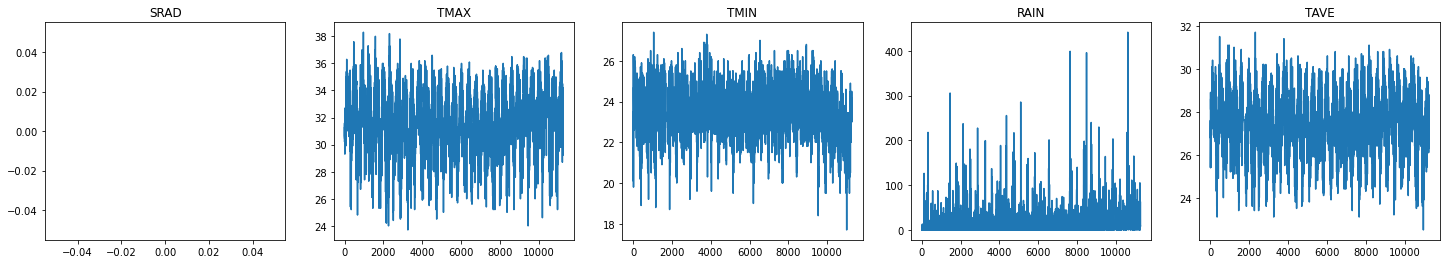

In [660]:
fig, axes = plt.subplots(1, 5, figsize=(25,4))

axes[0].plot(df['SRAD'])
axes[0].set_title("SRAD")

axes[1].plot(df['TMAX'])
axes[1].set_title("TMAX")

axes[2].plot(df['TMIN'])
axes[2].set_title("TMIN")

axes[3].plot(df['RAIN'])
axes[3].set_title("RAIN")

axes[4].plot(df['TAVE'])
axes[4].set_title("TAVE")




      SRAD      TMAX      TMIN      RAIN      TAVE
SRAD   NaN       NaN       NaN       NaN       NaN
TMAX   NaN  1.000000  0.272347 -0.282637  0.899701
TMIN   NaN  0.272347  1.000000 -0.101155  0.654270
RAIN   NaN -0.282637 -0.101155  1.000000 -0.264564
TAVE   NaN  0.899701  0.654270 -0.264564  1.000000


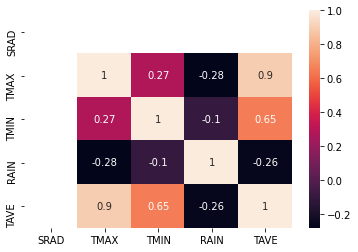

In [661]:
# Computing the Correlation Matrix
df_corr  = df.copy()
df_corr.drop('DATE',
            axis='columns', inplace=True)
corrMatrix = df_corr.corr()
print (corrMatrix)
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [662]:
df['TAVE']

0        26.800000
1        27.500000
2        26.900000
3        27.600000
4        25.400000
           ...    
11257    28.200000
11258    28.500000
11259    26.800000
11260    26.300000
11261    27.616152
Name: TAVE, Length: 11262, dtype: float64

In [663]:
#Fourier Tranform of TAVE
dt = 1
n = df['TAVE'].size
F = fft(df['TAVE'].values) # Fourier Tranform of TAVE
w = fftfreq(n, dt) # sample Freq
t=np.linspace(1, n, n) # 
To= = n/t[563030]
indices = np.where(w > 0)
w_pos = abs(w[indices])
F_pos = abs(F[indices F

Text(0.5, 1.0, 'FFT ')

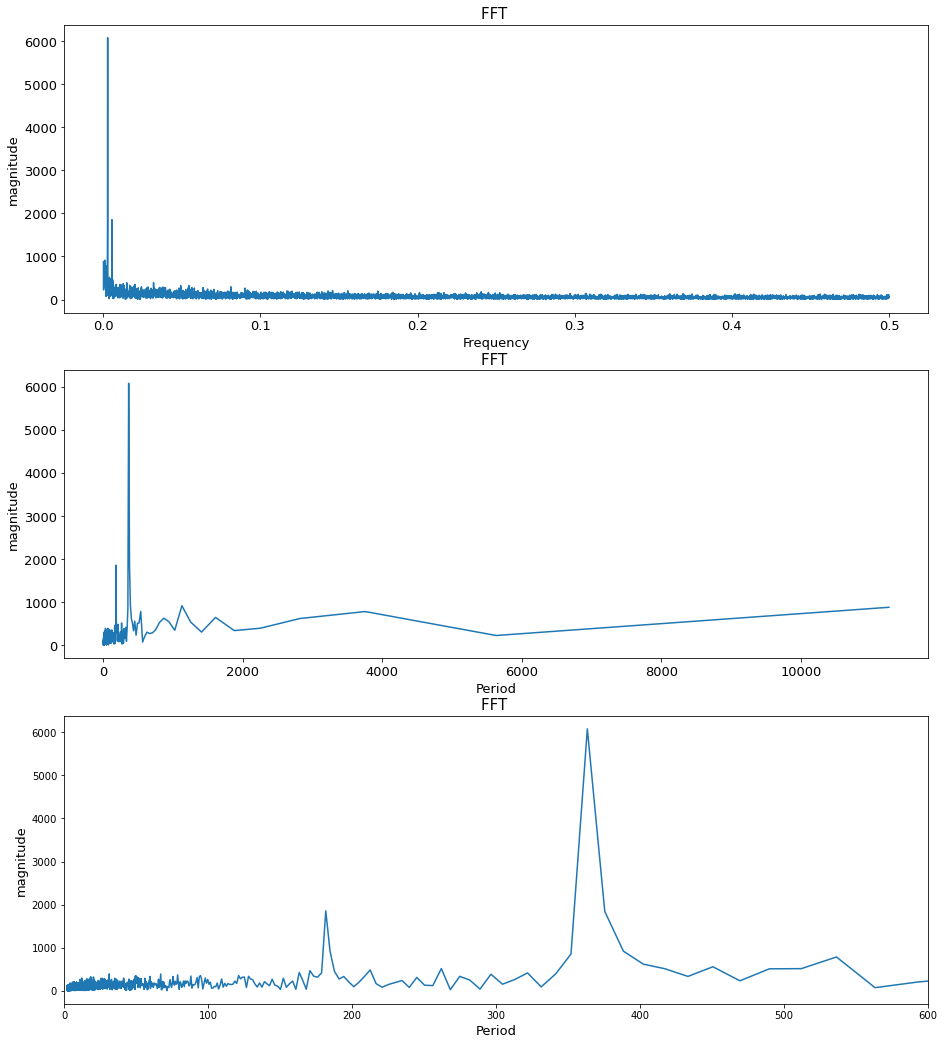

In [664]:
fig1 = plt.figure()
ax = fig1.add_axes([0, 0, 2, 1])
axF = fig1.add_axes([0, 1.2, 2, 1])
axT = fig1.add_axes([0, -1.2, 2, 1])

axF.plot(w_pos, abs(F_pos))
axF.set_xlabel('Frequency', fontsize = 13)
axF.set_ylabel('magnitude', fontsize = 13)
axF.set_title('FFT ', fontsize = 15)
axF.tick_params(labelsize = 13)

ax.plot(T, abs(F_pos))
ax.set_xlabel('Period', fontsize = 13)
ax.set_ylabel('magnitude', fontsize = 13)
ax.set_title('FFT ', fontsize = 15)
ax.tick_params(labelsize = 13)

axT.plot(T, abs(F_pos))
plt.xlim(0,600)
axT.set_xlabel('Period', fontsize = 13)
axT.set_ylabel('magnitude', fontsize = 13)
axT.set_title('FFT ', fontsize = 15)

In [665]:
df['Day'] = pd.to_datetime(df['DATE'], format='%Y%j', errors='ignore')
sdf

,DATE,SRAD,TMAX,TMIN,RAIN,TAVE,Day
0,1988001,NaN,30.500000,23.000000,0.000000,26.800000,1988-01-01
1,1988002,NaN,31.600000,23.300000,0.000000,27.500000,1988-01-02
2,1988003,NaN,30.600000,23.200000,7.700000,26.900000,1988-01-03
3,1988004,NaN,31.600000,23.500000,0.900000,27.600000,1988-01-04
4,1988005,NaN,30.700000,20.100000,0.300000,25.400000,1988-01-05
...,...,...,...,...,...,...,...
11257,2018300,NaN,33.000000,23.400000,8.019324,28.200000,2018-10-27
11258,2018301,NaN,32.500000,24.500000,8.019324,28.500000,2018-10-28
11259,2018302,NaN,29.800000,23.700000,63.100000,26.800000,2018-10-29
11260,2018303,NaN,29.600000,23.000000,13.100000,26.300000,2018-10-30


In [666]:
df_2000 = df[df['Day'].dt.year == 2001]
df_2000

,DATE,SRAD,TMAX,TMIN,RAIN,TAVE,Day
4749,2001001,NaN,28.5,22.6,0.2,25.6,2001-01-01
4750,2001002,NaN,28.4,22.4,0.0,25.4,2001-01-02
4751,2001003,NaN,28.5,23.2,0.0,25.9,2001-01-03
4752,2001004,NaN,28.5,22.5,0.0,25.5,2001-01-04
4753,2001005,NaN,29.0,22.4,0.0,25.7,2001-01-05
...,...,...,...,...,...,...,...
5109,2001361,NaN,28.6,23.4,12.7,26.0,2001-12-27
5110,2001362,NaN,29.0,22.1,72.2,25.6,2001-12-28
5111,2001363,NaN,27.8,21.5,4.3,24.6,2001-12-29
5112,2001364,NaN,27.4,24.0,1.6,25.7,2001-12-30


In [667]:
## เดี๋ยวมาทำต่อ คิดไม่ออก AVG PROB
rain2000 = df_2000['RAIN']
rain2000[rain2000>0].mean()
print(f'AVG prob of rain is',rain2000[rain2000>0].mean())

AVG prob of rain is 14.590340909090914


In [668]:
Oct_df= df[df['Day'].dt.month == 10]
Oct_df

,DATE,SRAD,TMAX,TMIN,RAIN,TAVE,Day
274,1988275,NaN,33.900000,23.400000,4.500000,28.600000,1988-10-01
275,1988276,NaN,33.200000,21.600000,83.600000,27.400000,1988-10-02
276,1988277,NaN,32.100000,21.800000,0.000000,27.000000,1988-10-03
277,1988278,NaN,32.100000,24.200000,0.000000,28.100000,1988-10-04
278,1988279,NaN,32.900000,24.500000,0.000000,28.700000,1988-10-05
...,...,...,...,...,...,...,...
11257,2018300,NaN,33.000000,23.400000,8.019324,28.200000,2018-10-27
11258,2018301,NaN,32.500000,24.500000,8.019324,28.500000,2018-10-28
11259,2018302,NaN,29.800000,23.700000,63.100000,26.800000,2018-10-29
11260,2018303,NaN,29.600000,23.000000,13.100000,26.300000,2018-10-30


In [669]:
Tmin_med = Oct_df['TMIN'].median()
print(f'median TMIN is',Tmin_med)

median TMIN is 23.5
